# Loading plotting and (hopefully) modelling of whisker movements


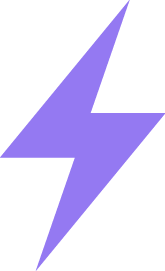

Running local mode, some functionality limited.



In [19]:
import numpy as np
# import tables as tb
import pandas as pd
# import scipy.io as sio
# from scipy import linalg
# import itertools
from scipy import signal
from lpproj import LocalityPreservingProjection
from wpca import WPCA, EMPCA, PCA
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans
# from sklearn import mixture
# from sklearn.externals.six.moves import xrange

%matplotlib inline
import matplotlib.pyplot as plt
# import sklearn as sk
import seaborn as sns

from lightning import Lightning
# lgn = Lightning(host="http://localhost:3000",ipython=True)
# lgn.create_session("whiskfree1")
lgn = Lightning(local=True,ipython=True)


In [4]:
theta = np.loadtxt('/Users/mathew/GoogleDrive/Data/Gutnisky_final/behaviour/theta_N18.csv')

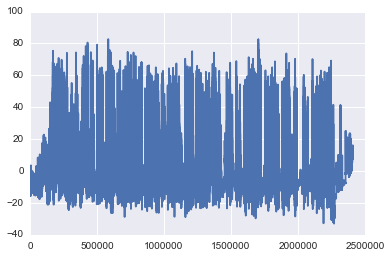

In [5]:
plt.plot(theta)

In [6]:
theta_bits = np.reshape(theta,(len(theta)/100,100))

In [7]:
theta_bits.shape

(24100, 100)

In [20]:
prange = range(17000,17010)
lgn.line(theta_bits[prange])

### Try high-pass filtering, then thresholding theta before computing autocorrelation

In [51]:
# Jake VDP's different PCAs example function
def plot_results(ThisPCA, X, weights=None, Xtrue=None, ncomp=2,prange=range(10)):
    # Compute the standard/weighted PCA
    if weights is None:
        kwds = {}
    else:
        kwds = {'weights': weights}
    
    # Compute the PCA vectors & variance
    pca = ThisPCA(n_components=10).fit(X, **kwds)
    
    # Reconstruct the data using the PCA model
    Y = ThisPCA(n_components=ncomp).fit_reconstruct(X, **kwds)
        
    # Create the plots
    fig, ax = plt.subplots(2, 2, figsize=(16, 6))
    if Xtrue is not None:
        ax[0, 0].plot(Xtrue[prange].T, c='gray', lw=1)
        ax[1, 1].plot(Xtrue[prange].T, c='gray', lw=1)
    ax[0, 0].plot(X[prange].T, c='black', lw=1)
    ax[1, 1].plot(Y[prange].T, c='black', lw=1)
    
    ax[0, 1].plot(pca.components_[:ncomp].T, c='black')
    
    ax[1, 0].plot(np.arange(1, 11), pca.explained_variance_ratio_)
    ax[1, 0].set_xlim(1, 10)
    ax[1, 0].set_ylim(0, None)
    
    ax[0, 0].xaxis.set_major_formatter(plt.NullFormatter())
    ax[0, 1].xaxis.set_major_formatter(plt.NullFormatter())
    
    ax[0, 0].set_title('Input Data')
    ax[0, 1].set_title('First {0} Principal Vectors'.format(ncomp))
    ax[1, 1].set_title('Reconstructed Data ({0} components)'.format(ncomp))
    ax[1, 0].set_title('PCA variance ratio')
    ax[1, 0].set_xlabel('principal vector')
    ax[1, 0].set_ylabel('proportion of total variance')
    
    fig.suptitle(ThisPCA.__name__, fontsize=16)

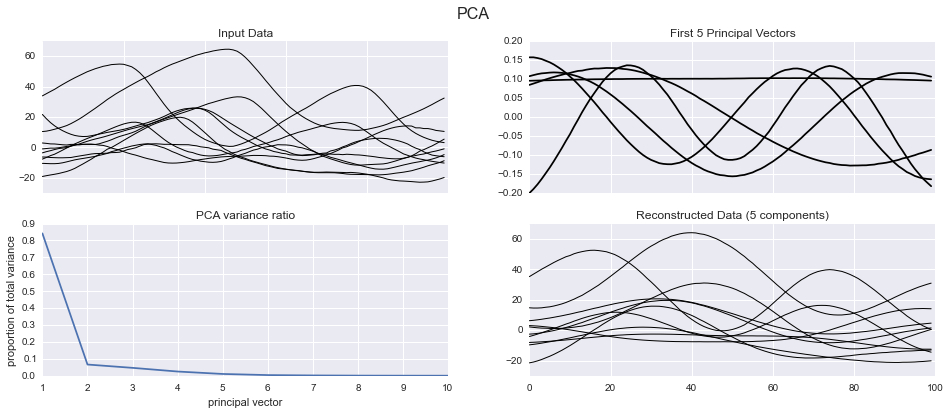

In [54]:
plot_results(PCA, theta_bits,ncomp=5,prange=range(17000,17010))

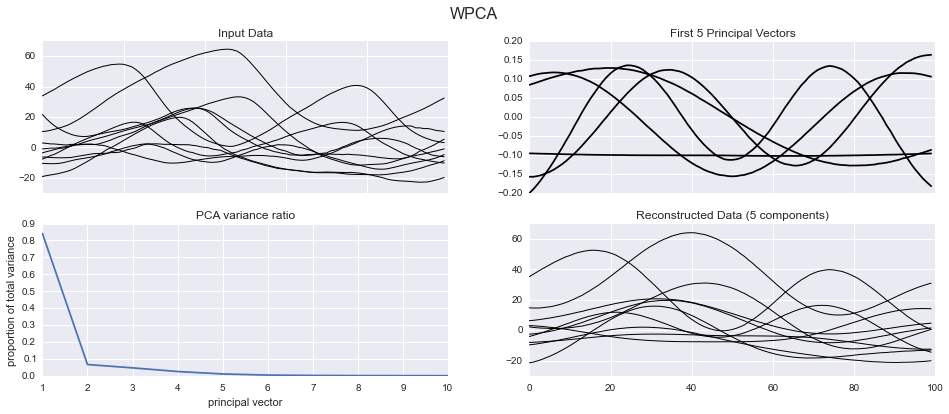

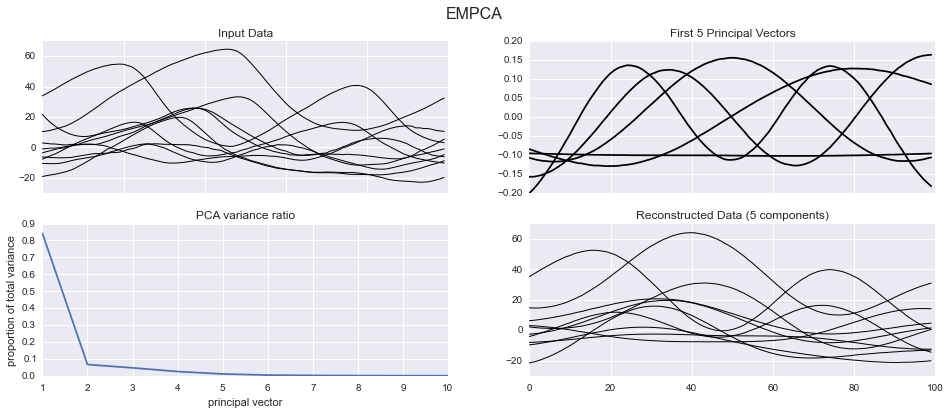

In [55]:
for method in [WPCA, EMPCA]:
    plot_results(method, theta_bits,ncomp=5,prange = range(17000,17010))

In [ ]:
# Jake VDP Locality preserving projection example
Xpca = PCA(n_components=3).fit_transform(theta_bits)
Xlpp = LocalityPreservingProjection(n_components=3).fit_transform(theta_bits)

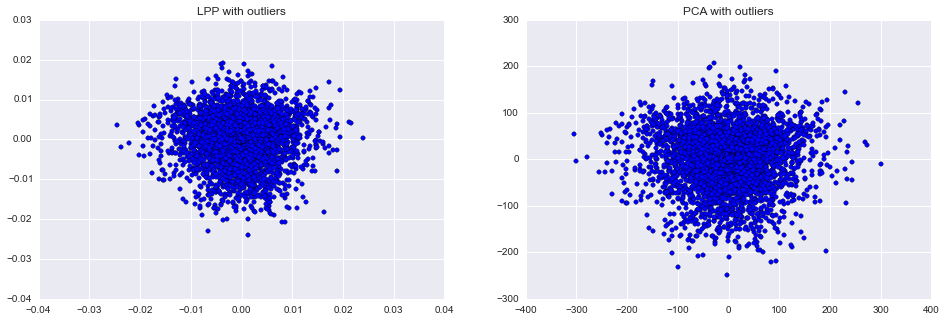

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax[0].scatter(Xlpp[:, 1], Xlpp[:, 2])
ax[0].set_title('LPP with outliers')
ax[1].scatter(Xpca[:, 1], Xpca[:, 2])
ax[1].set_title('PCA with outliers');

In [16]:
#TSNE visualisation
tsne = manifold.TSNE(n_components=2,learning_rate=500,verbose=1,random_state=0)
t0 = time()
X_tsne_pc = tsne.fit_transform(Xpca)
t1 = time()
t1-t0
X_tsne = tsne.fit_transform(theta_bits)
t2 = time()
t2-t1

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 24100
[t-SNE] Computed conditional probabilities for sample 2000 / 24100
[t-SNE] Computed conditional probabilities for sample 3000 / 24100
[t-SNE] Computed conditional probabilities for sample 4000 / 24100
[t-SNE] Computed conditional probabilities for sample 5000 / 24100
[t-SNE] Computed conditional probabilities for sample 6000 / 24100
[t-SNE] Computed conditional probabilities for sample 7000 / 24100
[t-SNE] Computed conditional probabilities for sample 8000 / 24100
[t-SNE] Computed conditional probabilities for sample 9000 / 24100
[t-SNE] Computed conditional probabilities for sample 10000 / 24100
[t-SNE] Computed conditional probabilities for sample 11000 / 24100
[t-SNE] Computed conditional probabilities for sample 12000 / 24100
[t-SNE] Computed conditional probabilities for sample 13000 / 24100
[t-SNE] Computed conditional probabilities 

717.4649369716644

In [14]:
from sklearn import manifold
from time import time
t0 = time()
Xpca.shape
# manifold.TSNE?
t1 = time()
t1-t0

8.511543273925781e-05

In [9]:
Xpca = PCA(n_components=10).fit_transform(theta_bits)


/Users/mathew/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


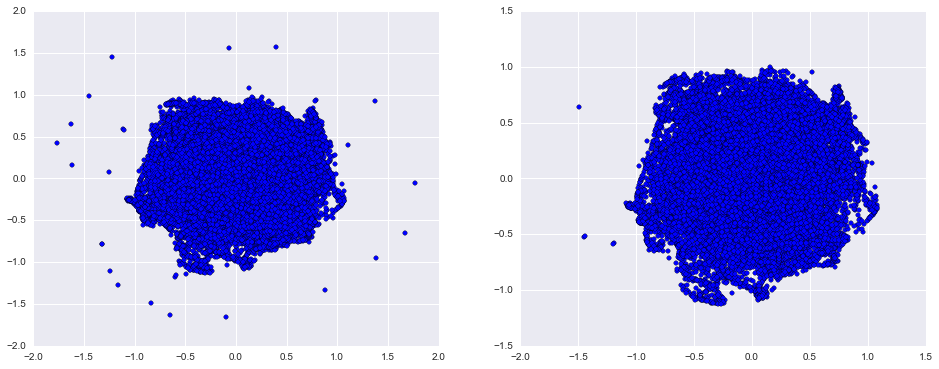

In [18]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
ax[0].scatter(X_tsne[:,0],X_tsne[:,1])
ax[1].scatter(X_tsne_pc[:,0],X_tsne_pc[:,1])

In [24]:
# lgn = Lightning(host="http://localhost:3000",ipython=False)
# lgn.scatter(X_tsne[:,0],X_tsne[:,1],size=1,colormap='Purples')
# lgn.scatter?
mds = manifold.MDS(2, max_iter=100, n_init=1)
X_mds = mds.fit_transform(Xpca)

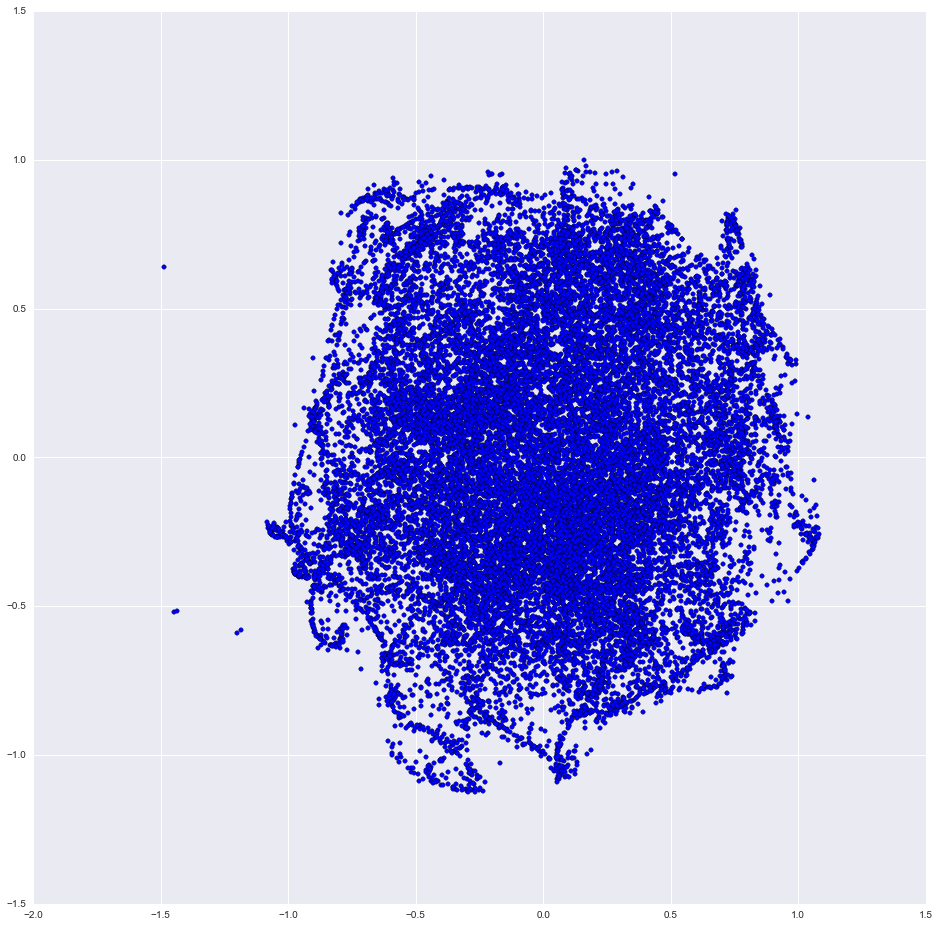

In [25]:
plt.figure(figsize=(16,16))
plt.scatter(X_tsne_pc[:,0],X_tsne_pc[:,1])

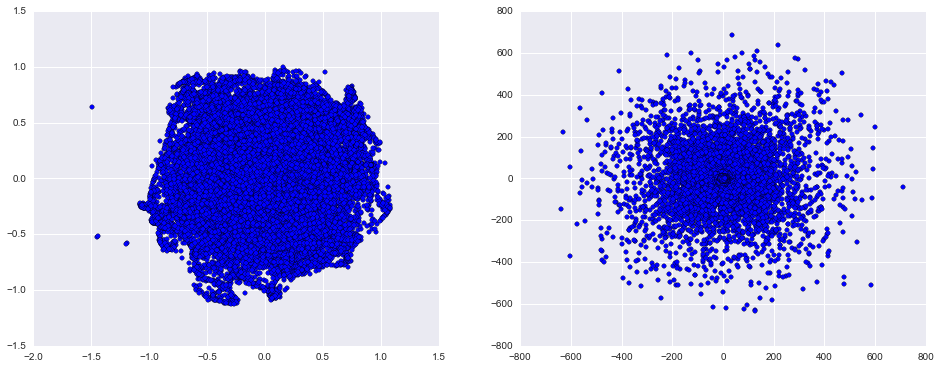

In [29]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
ax[0].scatter(X_tsne_pc[:,0],X_tsne_pc[:,1])
ax[1].scatter(X_mds[:,0],X_mds[:,1])

In [30]:
acorr = signal.fftconvolve(theta, theta[::-1], mode='full') # much faster than np.correlate
lgn.line(acorr[len(theta)-1:len(theta)+10000])

In [31]:
Y = PCA(n_components=10).fit_reconstruct(theta_bits)

In [100]:
from pandas import DataFrame
df = DataFrame(Xpca)

In [112]:
# Try seaborn pairplot of first 5 PCs
import random
# sns.pairplot?
# x = df.sample(100)
# x?
random.sample(df.index, 10)

[19965, 2969, 13231, 20051, 13310, 9887, 10545, 22324, 17945, 23417]

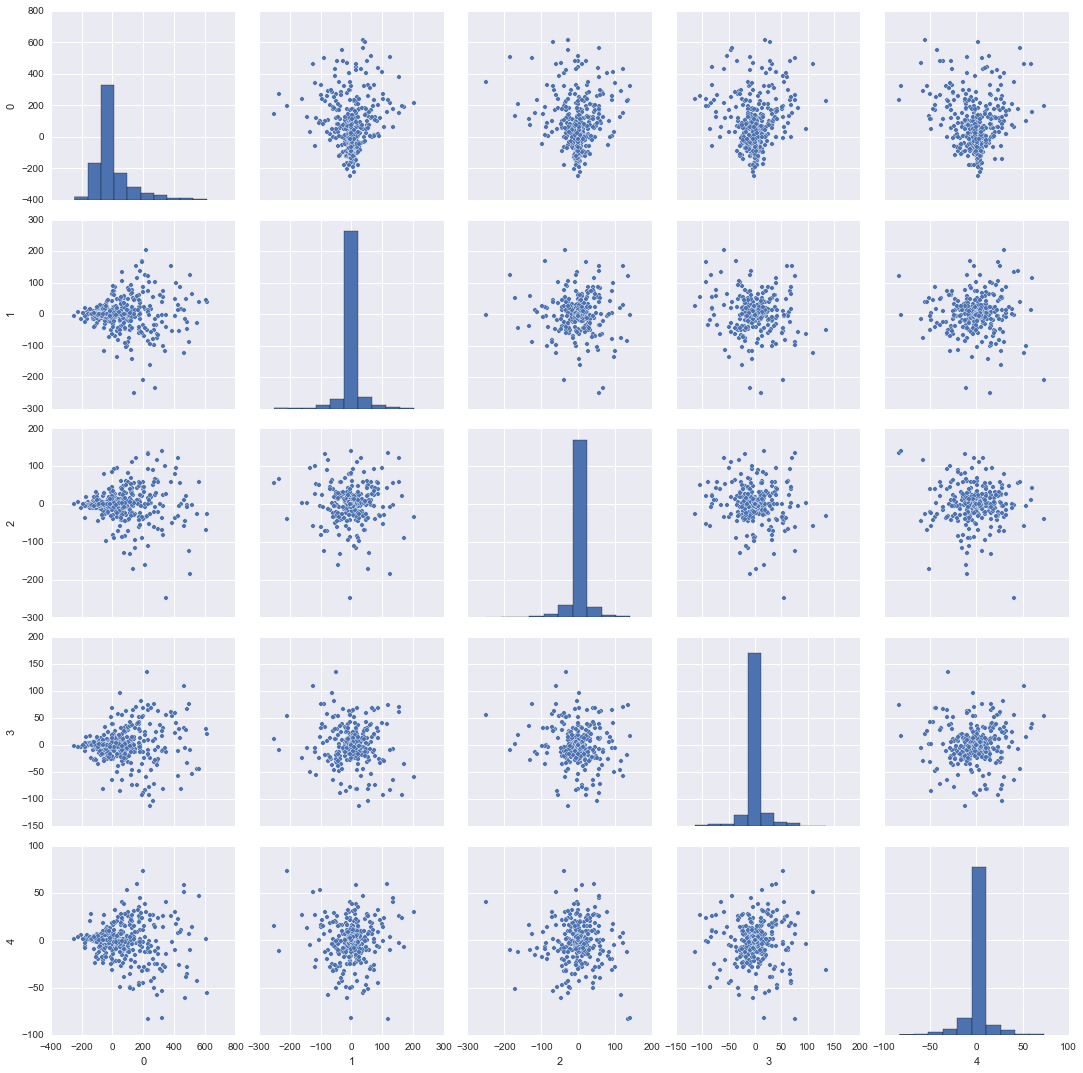

In [124]:
x = Xpca[random.sample(df.index, 1000),:5]
# sns.pairplot(df[random.sample(df.index, 10),:5])
df_r = DataFrame(x)
sns.pairplot(df_r)

In [89]:
lgn.line([np.reshape(Y,(len(theta)))[5e5:6e5],theta[5e5:6e5]])
# lgn.line()

/Users/mathew/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
